# Boston Housing dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import tree


In [2]:
# Load the Boston Housing dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
data = pd.read_csv(url, delim_whitespace=True, names=names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Split the data into features (X) and target (y)
X = data.drop('PRICE', axis=1)
y = data['PRICE']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [6]:

# Create a Decision Tree Regressor object
regressor = DecisionTreeRegressor(random_state=42)


In [7]:

# Train the model using the training sets
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7450980392156863
Mean Squared Error: 12.994509803921567
Root Mean Squared Error: 3.604789841852305


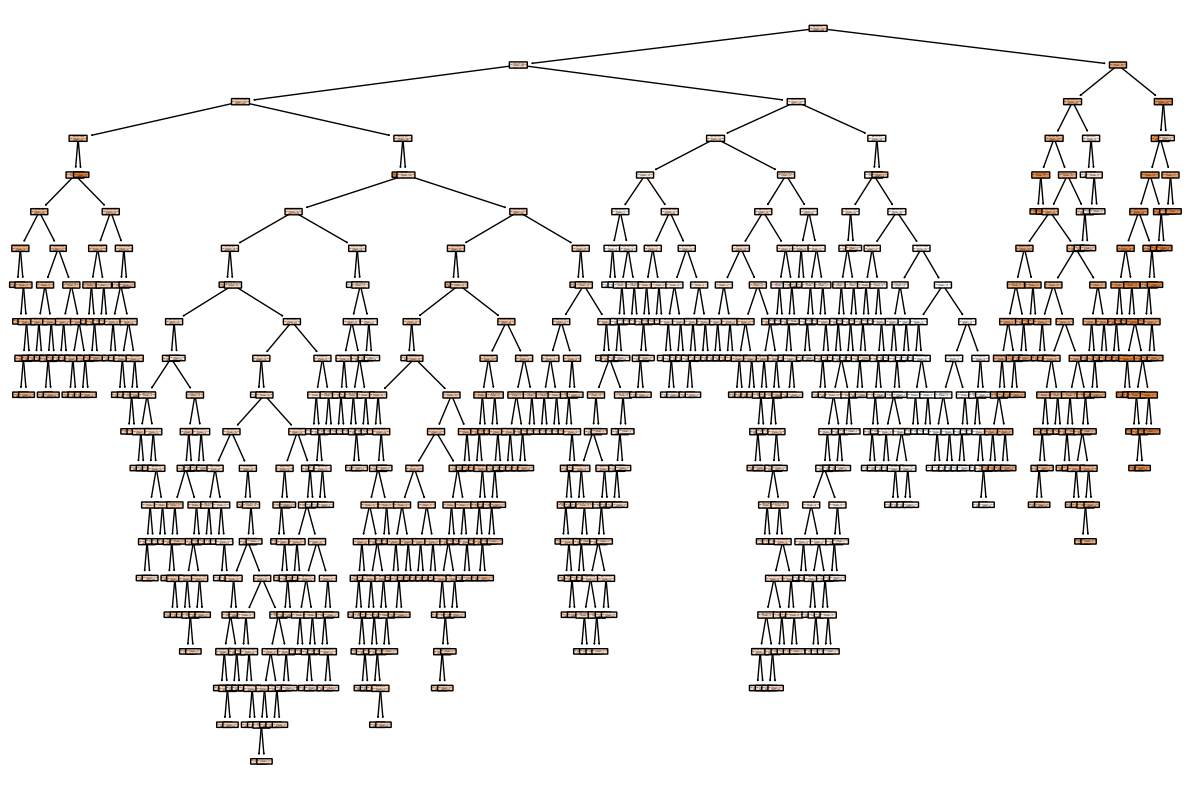

In [9]:
# Visualize the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor, filled=True, rounded=True, feature_names=list(X.columns.values))
plt.show()

In [10]:
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree as a DOT object
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=list(X.columns.values),
                           filled=True, rounded=True)

# Convert the DOT object to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# You can convert the graph to a variety of formats, such as SVG, PDF, or PNG
# Here, we convert the graph to a PNG
graph.write_svg('tree.svg')

# Display the graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# print the first 10 predicted values
print(y_pred[:10])

In [ ]:
# Example of a new data point
new_data = [[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]]

# Make a prediction on the new data point
new_pred = regressor.predict(new_data)

# print the predicted house price
print(new_pred)